In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = web.DataReader('NFLX',data_source='yahoo',start='2012-01-01',end='2021-04-25')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,10.388571,10.018571,10.040000,10.320000,29213800.0,10.320000
2012-01-04,11.567143,10.258571,10.335714,11.492857,100489900.0,11.492857
2012-01-05,11.694286,11.040000,11.345714,11.328571,86552900.0,11.328571
2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714
...,...,...,...,...,...,...
2021-04-19,556.440002,545.530029,546.900024,554.440002,4288700.0,554.440002
2021-04-20,563.559998,546.299988,554.419983,549.570007,11257600.0,549.570007
2021-04-21,515.460022,503.600006,508.000000,508.899994,22897400.0,508.899994


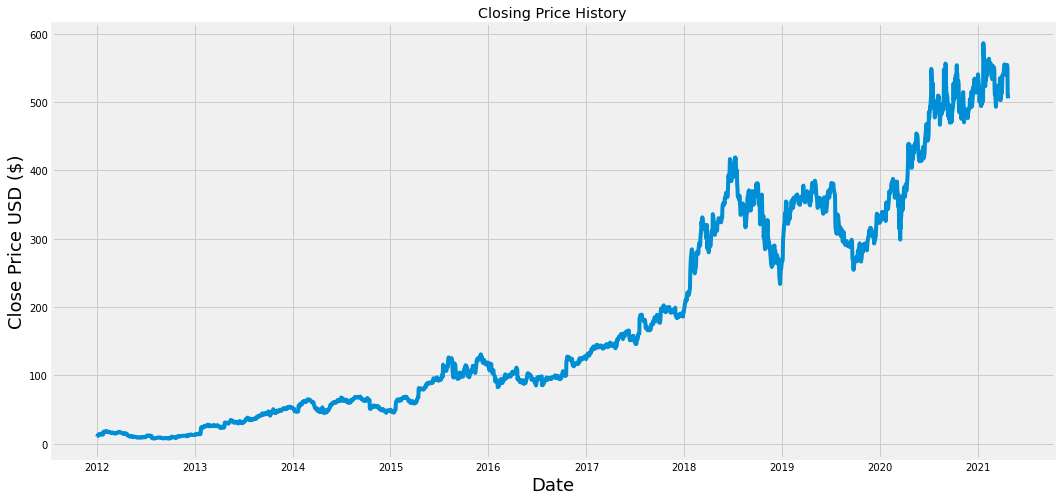

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])

dataset=data.values

training_data_len=math.ceil(len(dataset)*.8)
 
training_data_len

1874

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

scaled_data

array([[0.00455243],
       [0.0065793 ],
       [0.0062954 ],
       ...,
       [0.8661722 ],
       [0.86596483],
       [0.8603829 ]])

In [ ]:
train_data= scaled_data[0:training_data_len , :]

x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00455243, 0.0065793 , 0.0062954 , 0.00802107, 0.01095646,
       0.01037629, 0.00946778, 0.00946778, 0.01001832, 0.01010226,
       0.01104533, 0.01225997, 0.01146502, 0.00991463, 0.00959616,
       0.01018126, 0.01535829, 0.01727901, 0.01768389, 0.01639271,
       0.01707657, 0.01733085, 0.01793076, 0.01862696, 0.01828874,
       0.01733085, 0.01753823, 0.01731357, 0.01592364, 0.01710125,
       0.01685191, 0.01681488, 0.01680006, 0.01570146, 0.01446706,
       0.01461272, 0.01428684, 0.0137289 , 0.01469419, 0.01405478,
       0.01455347, 0.01513364, 0.01407453, 0.01316602, 0.01268707,
       0.01339808, 0.01365977, 0.01293642, 0.01297345, 0.01270188,
       0.01391653, 0.01386468, 0.01494354, 0.01511389, 0.01636803,
       0.01602981, 0.01639025, 0.01683463, 0.01650875, 0.01604955])]
[0.015121292204646121]



In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1814, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1814/1814 [==============================] - 56s 28ms/step - loss: 0.0017


In [ ]:
test_data=scaled_data[training_data_len - 60:,:]

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions= model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse

22.573457832010384

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


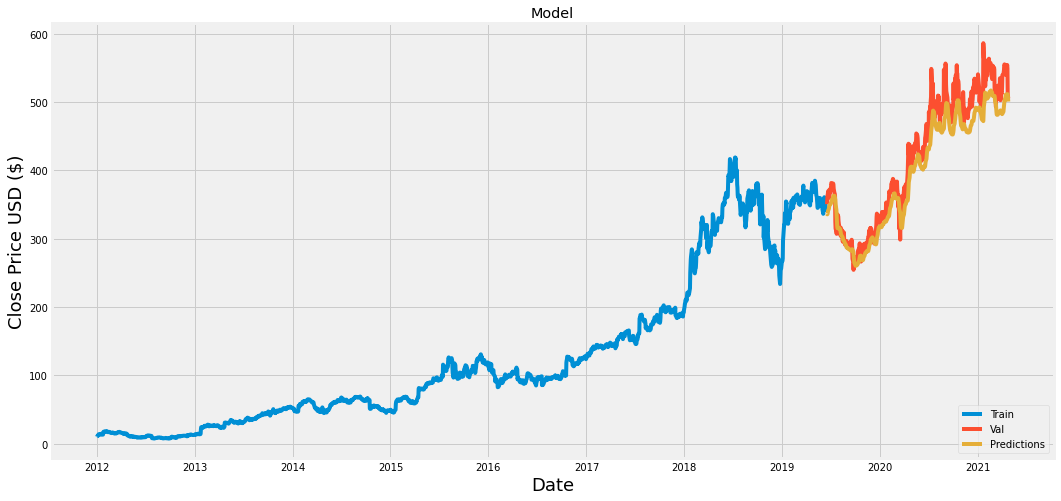

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:

stock=web.DataReader('NFLX',data_source='yahoo',start='2012-01-01',end='2021-04-21')

new_df=stock.filter(['Close'])

last_60_days=new_df[-60:].values

last_60_days_scaled=scaler.transform(last_60_days)

X_test=[]

X_test.append(last_60_days_scaled)

X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[506.8906]]


In [ ]:
stock2=web.DataReader('NFLX',data_source='yahoo',start='2021-04-22',end='2021-04-22')
print(stock2['Close'])

Date
2021-04-22    508.779999
Name: Close, dtype: float64
